In [1]:
# Libaries

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
# Import data
pd.set_option('display.max_columns', None)
df = pd.read_csv(r'C:\Users\ljant\Desktop\Ironhack\11_Regex\lab-comparing-regression-models\data.csv')
df
#8681 x 63

,state_arizona,state_california,state_nevada,state_oregon,state_washington,response_no,response_yes,coverage_basic,coverage_extended,coverage_premium,education_bachelor,education_college,education_doctor,education_high_school_or_below,education_master,employmentstatus_disabled,employmentstatus_employed,employmentstatus_medical_leave,employmentstatus_retired,employmentstatus_unemployed,gender_f,gender_m,location_code_rural,location_code_suburban,location_code_urban,marital_status_divorced,marital_status_married,marital_status_single,policy_corporate_l1,policy_corporate_l2,policy_corporate_l3,policy_personal_l1,policy_personal_l2,policy_personal_l3,policy_special_l1,policy_special_l2,policy_special_l3,renew_offer_type_offer1,renew_offer_type_offer2,renew_offer_type_offer3,renew_offer_type_offer4,sales_channel_agent,sales_channel_branch,sales_channel_call_center,sales_channel_web,vehicle_class_four-door_car,vehicle_class_luxury_car,vehicle_class_luxury_suv,vehicle_class_suv,vehicle_class_sports_car,vehicle_class_two-door_car,vehicle_size_large,vehicle_size_medsize,vehicle_size_small,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,income,total_claim_amount,effective_day,effective_month
0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,69,32,5,0,1,0.562847,384.811147,24,2
1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,108,18,38,0,2,0.487763,566.472247,19,2
2,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,106,18,65,0,7,0.000000,529.881344,20,1
3,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,73,12,44,0,1,0.438443,138.130879,3,2
4,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,69,14,94,0,2,0.629140,159.383042,25,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8676,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,73,18,89,0,2,0.719547,198.234764,10,2
8677,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,79,14,28,0,1,0.216081,379.200000,12,2
8678,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,85,9,37,3,2,0.000000,790.784983,6,2
8679,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,96,34,3,0,3,0.219452,691.200000,3,2


In [3]:
# Split data
X = df.drop('total_claim_amount', axis = 1) #identifying the target and removing it from train set
Y = df['total_claim_amount']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [4]:
model = sm.OLS(Y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     total_claim_amount   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     521.3
Date:                Fri, 10 Nov 2023   Prob (F-statistic):               0.00
Time:                        15:58:04   Log-Likelihood:                -41627.
No. Observations:                6944   AIC:                         8.335e+04
Df Residuals:                    6894   BIC:                         8.370e+04
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
state_arizona                      0.6545      2.927      0.224      0.823      -5.083       6.392
state_california                   1.8972      2.579      0.736      0.462      -3.159       6.953
state_nevada                      -1.5874      3.614     -0.439      0.660      -8.671       5.496
state_oregon                      -0.5561      2.690     -0.207      0.836      -5.830       4.717
state_washington                   9.5757      3.803      2.518      0.012       2.120      17.031
response_no                       10.9060      4.344      2.510      0.012       2.390      19.422
response_yes                      -0.9221      4.400     -0.210      0.834      -9.547       7.703
coverage_basic                    -6.5474      2.550     -2.568      0.010     -11.546      -1.548
coverage_extended                  3.6015      3.073      1.172      0.241      -2.422       9.626
coverage_premium                  12.9298      7.825      1.652      0.099      -2.410      28.270
education_bachelor                 6.1742      2.782      2.219      0.027       0.720      11.628
education_college                  1.5060      2.764      0.545      0.586      -3.912       6.924
education_doctor                  -6.3597      5.173     -1.229      0.219     -16.500       3.781
education_high_school_or_below    10.9111      2.820      3.869      0.000       5.382      16.440
education_master                  -2.2478      3.897     -0.577      0.564      -9.887       5.392
employmentstatus_disabled         -9.1973      5.112     -1.799      0.072     -19.218       0.823
employmentstatus_employed         -9.0151      3.659     -2.464      0.014     -16.188      -1.842
employmentstatus_medical_leave    -5.4751      5.034     -1.088      0.277     -15.343       4.392
employmentstatus_retired          -1.4954      6.099     -0.245      0.806     -13.452      10.461
employmentstatus_unemployed       35.1668      3.679      9.560      0.000      27.955      42.378
gender_f                           2.0072      4.161      0.482      0.630      -6.150      10.164
gender_m                           7.9767      4.105      1.943      0.052      -0.070      16.023
location_code_rural             -191.3279      3.407    -56.152      0.000    -198.007    -184.648
location_code_suburban           173.6289      3.176     54.677      0.000     167.404     179.854
location_code_urban               27.6829      3.444      8.039      0.000      20.932      34.434
marital_status_divorced           -9.0138      3.522     -2.560      0.010     -15.917      -2.111
marital_status_married           -13.3122      3.101     -4.293      0.000     -19.391      -7.234
marital_status_single             32.3098      3.330      9.703      0.000      25.782      38.837
policy_corpora

In [5]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, Y_train)
lm.score(X_train, Y_train)

0.7874608945949413

In [6]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, Y_train)
lm.score(X_train, Y_train)

predictions = lm.predict(X_test)

print("R2 value is = ",round(r2_score(Y_test, predictions),2))
print("The intercept of the model is = ",lm.intercept_)
print("The coefficients of the model are = ",lm.coef_)

mse = mean_squared_error(Y_test, predictions)
mae = mean_absolute_error(Y_test, predictions)
print("The mse of the model is = ", round(mse,2))
print("The root mse of the model is = ",round(np.sqrt(mse),2))
print("The mean absolute error of the model is = ",round(mae,2))

R2 value is =  0.79
The intercept of the model is =  37.05122438485796
The coefficients of the model are =  [-1.34226408e+00 -9.95966913e-02 -3.58419849e+00 -2.55287113e+00
  7.57893039e+00  5.91405813e+00 -5.91405813e+00 -9.87539797e+00
  2.73574546e-01  9.60182343e+00  4.17738372e+00 -4.90734320e-01
 -8.35648145e+00  8.91436211e+00 -4.24453006e+00 -1.11940471e+01
 -1.10119046e+01 -7.47191225e+00 -3.49220392e+00  3.31700679e+01
 -2.98476379e+00  2.98476379e+00 -1.94655842e+02  1.70300902e+02
  2.43549408e+01 -1.23417217e+01 -1.66401101e+01  2.89818318e+01
  1.21459907e-01 -6.30399376e+00 -2.99586572e+00  1.90832011e+00
 -5.35843731e+00 -3.43334776e+00  7.52491209e+00  1.17396178e+01
 -3.20266533e+00 -8.27710531e+00  2.41794376e+00  3.16511423e+00
  2.69404732e+00 -3.39220651e+00  1.82739539e+00 -6.16172328e-01
  2.18098344e+00 -1.86573509e+00 -1.95207635e+01 -3.17624771e+01
  2.90788926e+01  2.39137596e+01  1.56323480e-01 -4.73411288e+00
 -2.13330431e+00  6.86741720e+00  3.34639489e+0

In [7]:
'''
Results:
- R² = 0,79
- MAE = 76,16 [currency]
- root MSE = 98.59 [currency]

--> Model is good but not great.
'''

'\nResults:\n- R² = 0,79\n- MAE = 76,16 [currency]\n- root MSE = 98.59 [currency]\n\n--> Model is good but not great.\n'

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [28]:
# Function to test: Linear Regression, KNeighborsRegressor, and MLPRegressor

def models(X, Y):

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
    
    # Initialising the models:
    models = {
        'Linear Regression': LinearRegression(),
        'KNeighborsRegressor': KNeighborsRegressor(),
        'MLPRegressor': MLPRegressor()
    }
    
    results = {}
    
    for model_name, model in models.items():
        # Training the model:
        model.fit(X_train, Y_train)
        
        # Predictions:
        predictions = model.predict(X_test)
        
        # Calculate metrics:
        r2 = r2_score(Y_test, predictions)
        mse = mean_squared_error(Y_test, predictions)
        mae = mean_absolute_error(Y_test, predictions)
        
        # Storing results:
        results[model_name] = {
            'R2': round(r2, 2),
            'Root MSE': round(np.sqrt(mse),2),
            'MAE': round(mae, 2)
        }
    
    return results

In [29]:
results = models(X, Y)

for model, metrics in results.items():
    print(f"Model: {model}")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print() 

Model: Linear Regression
R2: 0.79
Root MSE: 98.59
MAE: 76.16

Model: KNeighborsRegressor
R2: 0.16
Root MSE: 195.89
MAE: 144.76

Model: MLPRegressor
R2: 0.83
Root MSE: 88.09
MAE: 66.93



In [ ]:
'''
Interpretataion:
- The best result delivers the MLPRegressor model.
- The KNN model needs optimisation; here, K needs to be adjusted
- If the models need to be further optimised, analysing the coeffiecent and p-values of single columns should be considered.
'''

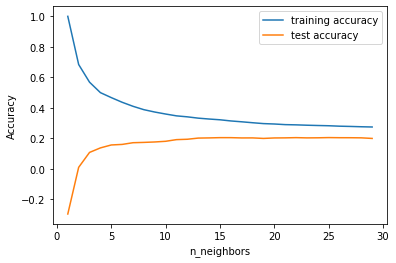

In [22]:
# Testing of I can optimise the KNN model:
import matplotlib.pyplot as plt
training_accuracy = []
test_accuracy = []

# try n_neighbors from 1 to 30
neighbors_settings = range(1, 30)

for n_neighbors in neighbors_settings:

  clf = KNeighborsRegressor(n_neighbors=n_neighbors)

  clf.fit(X_train, Y_train)

  training_accuracy.append(clf.score(X_train, Y_train))

  test_accuracy.append(clf.score(X_test, Y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

In [31]:
KNN = KNeighborsRegressor(n_neighbors = 15)
KNN = KNN.fit(X_train, Y_train)

# Predictions
predictions = KNN.predict(X_test)

print("R2 value is = ",round(r2_score(Y_test, predictions),2))
print("The intercept of the model is = ",lm.intercept_)
print("The coefficients of the model are = ",lm.coef_)

mse = mean_squared_error(Y_test, predictions)
mae = mean_absolute_error(Y_test, predictions)
print("The mse of the model is = ", round(mse,2))
print("The root mse of the model is = ",round(np.sqrt(mse),2))
print("The mean absolute error of the model is = ",round(mae,2))


R2 value is =  0.2
The intercept of the model is =  37.05122438485796
The coefficients of the model are =  [-1.34226408e+00 -9.95966913e-02 -3.58419849e+00 -2.55287113e+00
  7.57893039e+00  5.91405813e+00 -5.91405813e+00 -9.87539797e+00
  2.73574546e-01  9.60182343e+00  4.17738372e+00 -4.90734320e-01
 -8.35648145e+00  8.91436211e+00 -4.24453006e+00 -1.11940471e+01
 -1.10119046e+01 -7.47191225e+00 -3.49220392e+00  3.31700679e+01
 -2.98476379e+00  2.98476379e+00 -1.94655842e+02  1.70300902e+02
  2.43549408e+01 -1.23417217e+01 -1.66401101e+01  2.89818318e+01
  1.21459907e-01 -6.30399376e+00 -2.99586572e+00  1.90832011e+00
 -5.35843731e+00 -3.43334776e+00  7.52491209e+00  1.17396178e+01
 -3.20266533e+00 -8.27710531e+00  2.41794376e+00  3.16511423e+00
  2.69404732e+00 -3.39220651e+00  1.82739539e+00 -6.16172328e-01
  2.18098344e+00 -1.86573509e+00 -1.95207635e+01 -3.17624771e+01
  2.90788926e+01  2.39137596e+01  1.56323480e-01 -4.73411288e+00
 -2.13330431e+00  6.86741720e+00  3.34639489e+00

In [ ]:
'''
Result:
Did not really optimise the model...
'''

# EXTRA: Optimising the model(s)

In [40]:
import statsmodels.api as sm

def select_significant_features(X, Y):
    
    """
    Select independent variables with P>|t| < 0.05 from the OLS model summary.
    """
    
    model = sm.OLS(Y, X).fit()
    summary = model.summary()

    significant_features = []
    table = summary.tables[1]
    headers = table.data[0]
    data = table.data[1:]

    p_value_index = headers.index('P>|t|') if 'P>|t|' in headers else headers.index('P>|t| [0.025')

    for row in data:
        p_value = float(row[p_value_index])
        if p_value < 0.05:
            significant_features.append(row[0])

    return significant_features

In [41]:
X = df.drop('total_claim_amount', axis=1)
Y = df['total_claim_amount']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

relevant_features = select_significant_features(X_train, Y_train)
print("Independent variables with P>|t| < 0.05:", relevant_features)


Independent variables with P>|t| < 0.05: ['state_washington', 'response_no', 'coverage_basic', 'education_bachelor', 'education_high_school_or_below', 'employmentstatus_employed', 'employmentstatus_unemployed', 'location_code_rural', 'location_code_suburban', 'location_code_urban', 'marital_status_divorced', 'marital_status_married', 'marital_status_single', 'renew_offer_type_offer1', 'vehicle_class_suv', 'vehicle_class_sports_car', 'vehicle_size_small', 'monthly_premium_auto', 'months_since_policy_inception', 'income']


In [42]:
adj_df = df[relevant_features].copy()
adj_df

,state_washington,response_no,coverage_basic,education_bachelor,education_high_school_or_below,employmentstatus_employed,employmentstatus_unemployed,location_code_rural,location_code_suburban,location_code_urban,marital_status_divorced,marital_status_married,marital_status_single,renew_offer_type_offer1,vehicle_class_suv,vehicle_class_sports_car,vehicle_size_small,monthly_premium_auto,months_since_policy_inception,income
0,1,1,1,1,0,1,0,0,1,0,0,1,0,1,0,0,0,69,5,0.562847
1,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,108,38,0.487763
2,0,1,1,1,0,0,1,0,1,0,0,1,0,1,1,0,0,106,65,0.000000
3,1,1,1,1,0,1,0,1,0,0,0,0,1,1,0,0,0,73,44,0.438443
4,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,69,94,0.629140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8676,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,73,89,0.719547
8677,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,79,28,0.216081
8678,0,1,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,85,37,0.000000
8679,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,96,3,0.219452


In [43]:
# Testing the models again
X = adj_df 
Y = df['total_claim_amount']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [44]:
def models(X, Y):

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
    
    # Initialising the models:
    models = {
        'Linear Regression': LinearRegression(),
        'KNeighborsRegressor': KNeighborsRegressor(),
        'MLPRegressor': MLPRegressor()
    }
    
    results = {}
    
    for model_name, model in models.items():
        # Training the model:
        model.fit(X_train, Y_train)
        
        # Predictions:
        predictions = model.predict(X_test)
        
        # Calculate metrics:
        r2 = r2_score(Y_test, predictions)
        mse = mean_squared_error(Y_test, predictions)
        mae = mean_absolute_error(Y_test, predictions)
        
        # Storing results:
        results[model_name] = {
            'R2': round(r2, 2),
            'Root MSE': round(np.sqrt(mse),2),
            'MAE': round(mae, 2)
        }
    
    return results

In [45]:
results = models(X, Y)

for model, metrics in results.items():
    print(f"Model: {model}")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print() 

Model: Linear Regression
R2: 0.79
Root MSE: 98.39
MAE: 75.99

Model: KNeighborsRegressor
R2: 0.45
Root MSE: 157.76
MAE: 110.59

Model: MLPRegressor
R2: 0.81
Root MSE: 91.89
MAE: 71.3



In [ ]:
'''
Interpretation:
- The optimisation did not improve the Linear Regression model.
- The optimisation decreased the accuarcy of the MLPRegressor model.
- The optimisation improved the KNN Model a lot.

'''

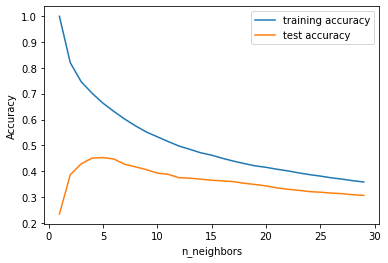

In [47]:
import matplotlib.pyplot as plt
training_accuracy = []
test_accuracy = []

# try n_neighbors from 1 to 30
neighbors_settings = range(1, 30)

for n_neighbors in neighbors_settings:

  clf = KNeighborsRegressor(n_neighbors=n_neighbors)

  clf.fit(X_train, Y_train)

  training_accuracy.append(clf.score(X_train, Y_train))

  test_accuracy.append(clf.score(X_test, Y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()